In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/112.6 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="G3gy8CV2o0N6SaOoF00a")
project = rf.workspace("moyed-chowdhury").project("mv_train_data")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!pip install supervision==0.1.0
! pip install opencv-python

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/MV_Train_Data-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

In [32]:
! yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data= /content/MV_Train_Data-2/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/MV_Train_Data-2/valid/labels.cache... 268 images, 4 backgrounds, 0 corrupt: 100% 268/268 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:08<00:00,  1.98it/s]
                   all        268        779      0.955      0.972      0.982      0.934
      EnergyPlus_Large        148        180       0.95      0.961      0.975      0.922
        EnergyPlus_Reg        257        599       0.96      0.983      0.988      0.945
Speed: 5.3ms preprocess, 14.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/137 /content/MV_Train_Data-2/test/images/Energy-00021_jpg.rf.d6adf67812c4e082b8a7762551d4820e.jpg: 800x800 2 EnergyPlus_Larges, 2 EnergyPlus_Regs, 25.5ms
image 2/137 /content/MV_Train_Data-2/test/images/Energy-00076_jpg.rf.65cf6adca53cbda089bf1031dd3b3111.jpg: 800x800 2 EnergyPlus_Larges, 1 EnergyPlus_Reg, 22.9ms
image 3/137 /content/MV_Train_Data-2/test/images/Energy-00136_jpg.rf.9f0b647935d4c3de5db36378a073a988.jpg: 800x800 2 EnergyPlus_Larges, 1 EnergyPlus_Reg, 22.9ms
image 4/137 /content/MV_Train_Data-2/test/images/Energy-00161_jpg.rf.aa273488721ae01a215bc37d0cfce239.jpg: 800x800 2 EnergyPlus_Larges, 1 EnergyPlus_Reg, 22.9ms
image 5/137 /content/MV_Train_Data-2/test/images/Energy-00196_jpg.rf.0dd23fe6701ffdcd1eb23bec2bc23087.jpg: 800x800 1 EnergyPlus_Large, 2 EnergyPlus_Regs, 33.9ms
image 6/137 /content/MV_Trai

In [9]:
from IPython.display import display, Image

/content


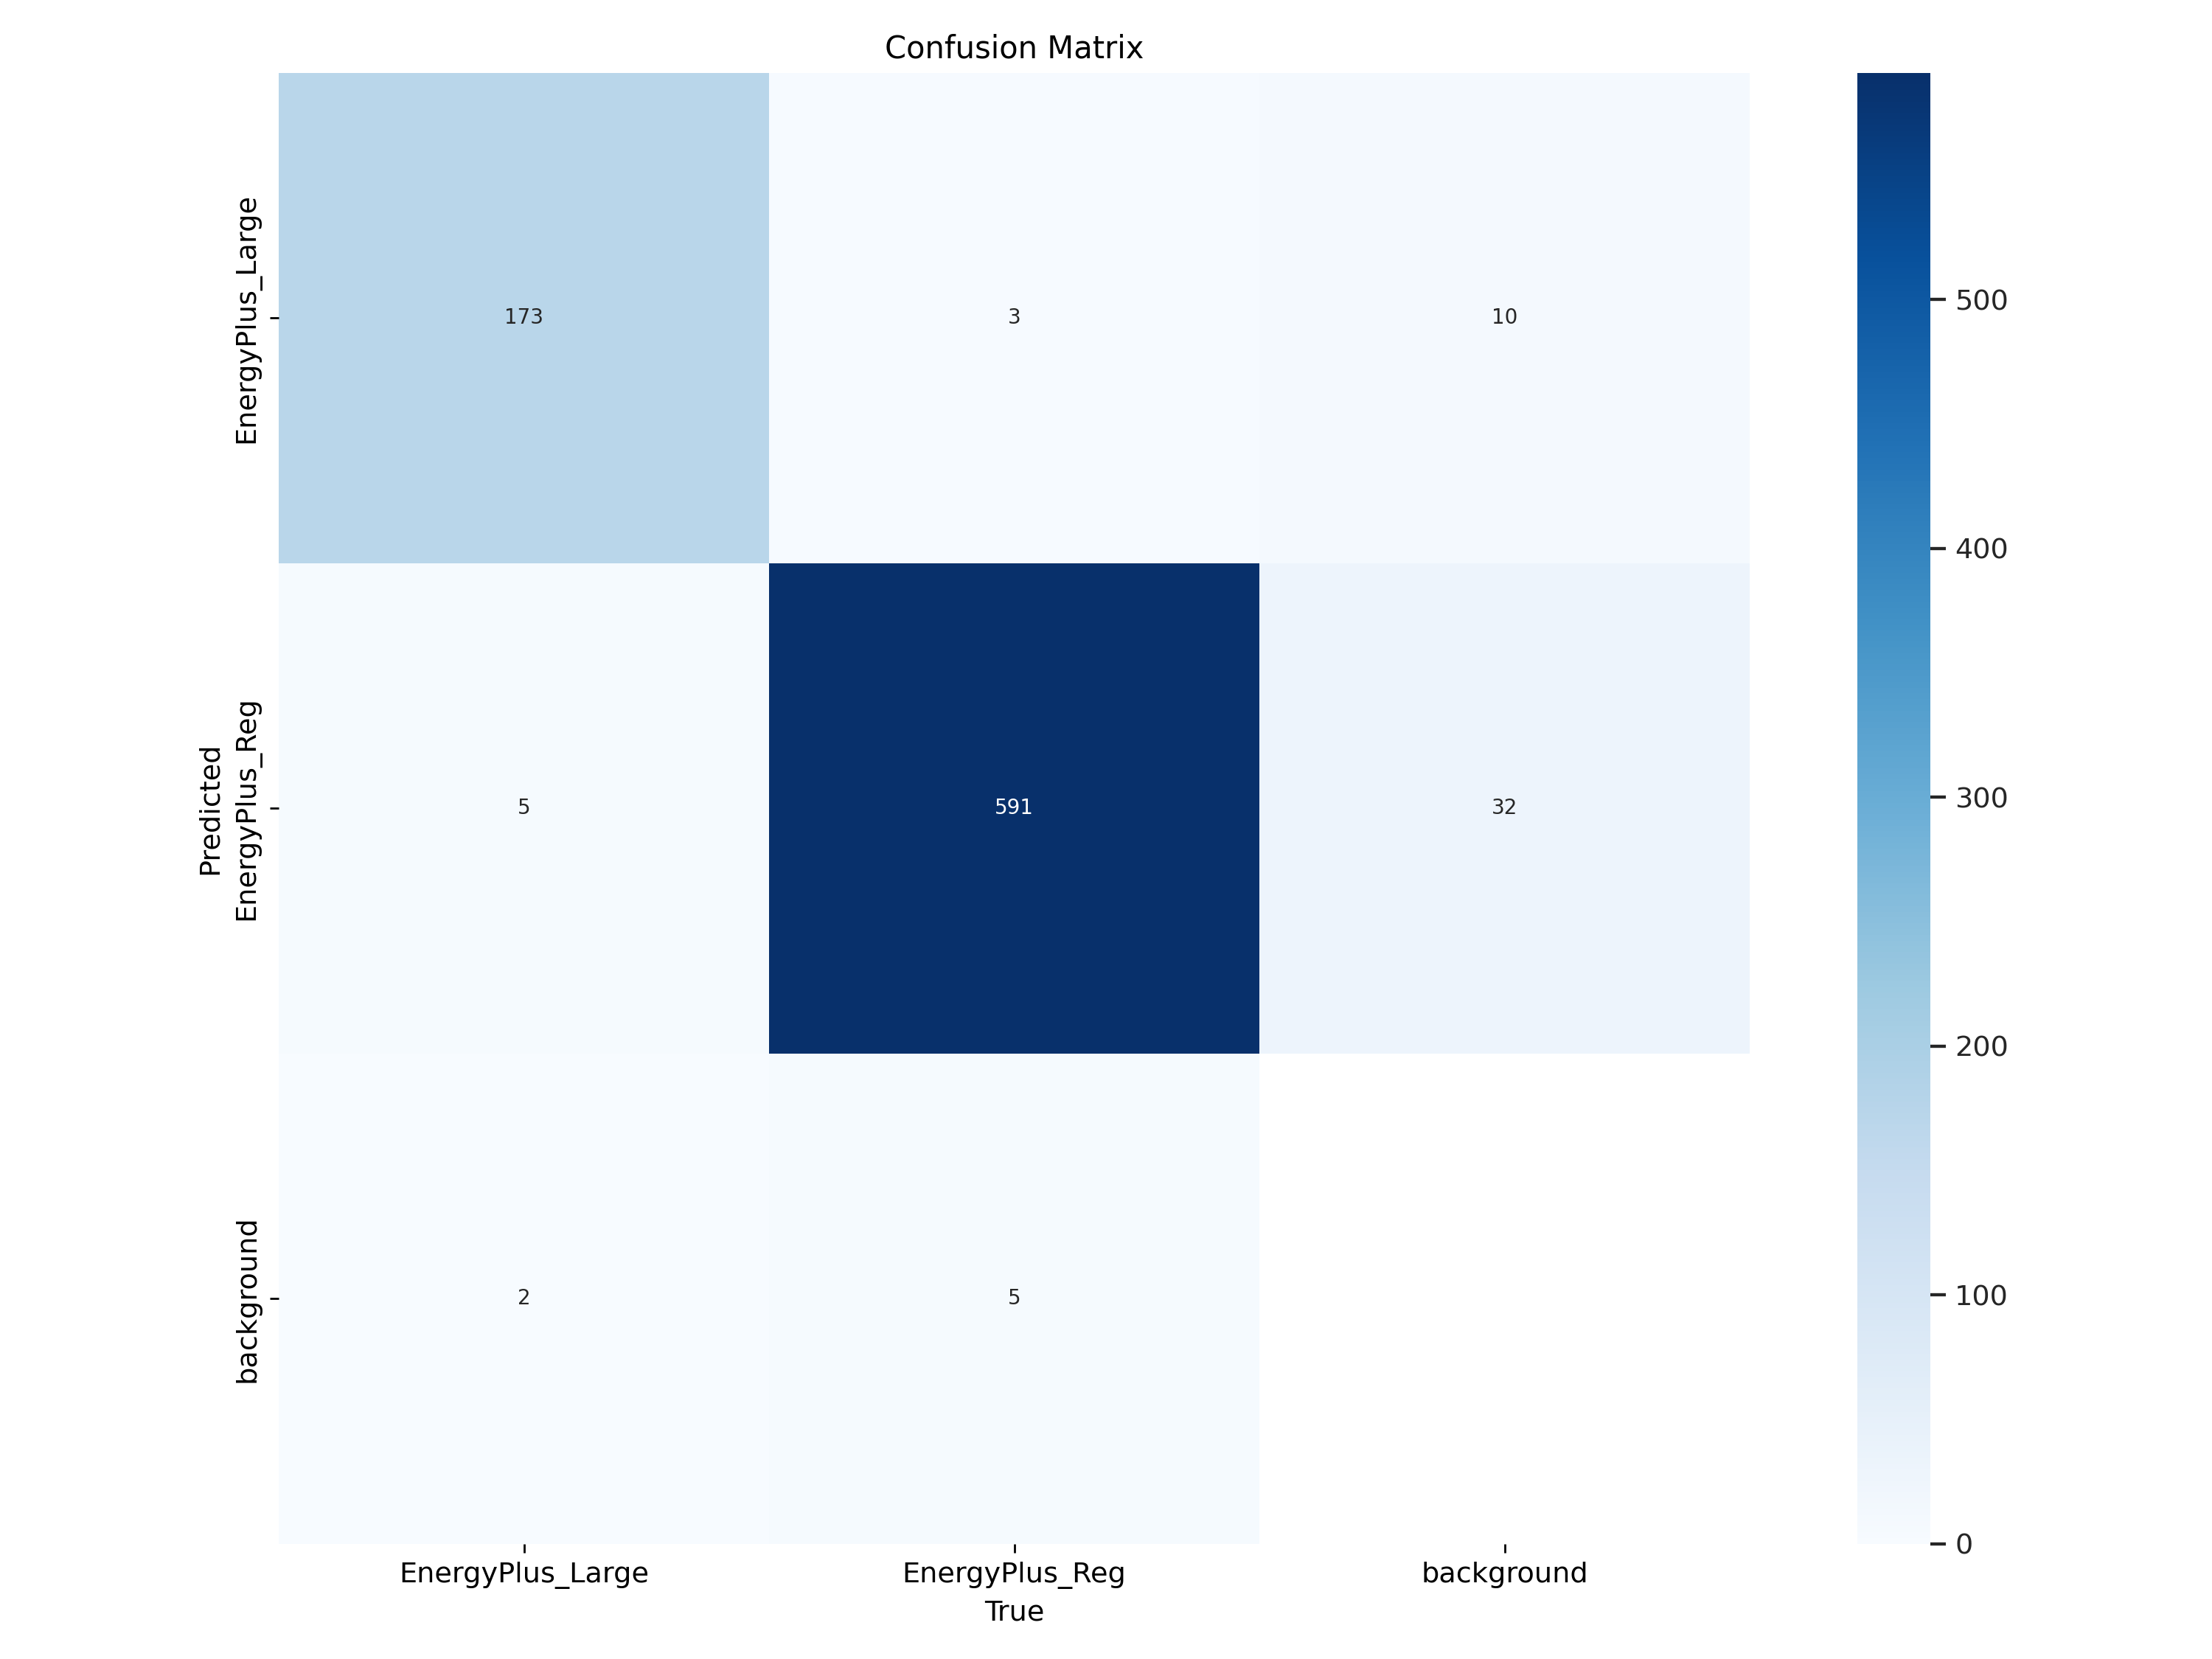

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


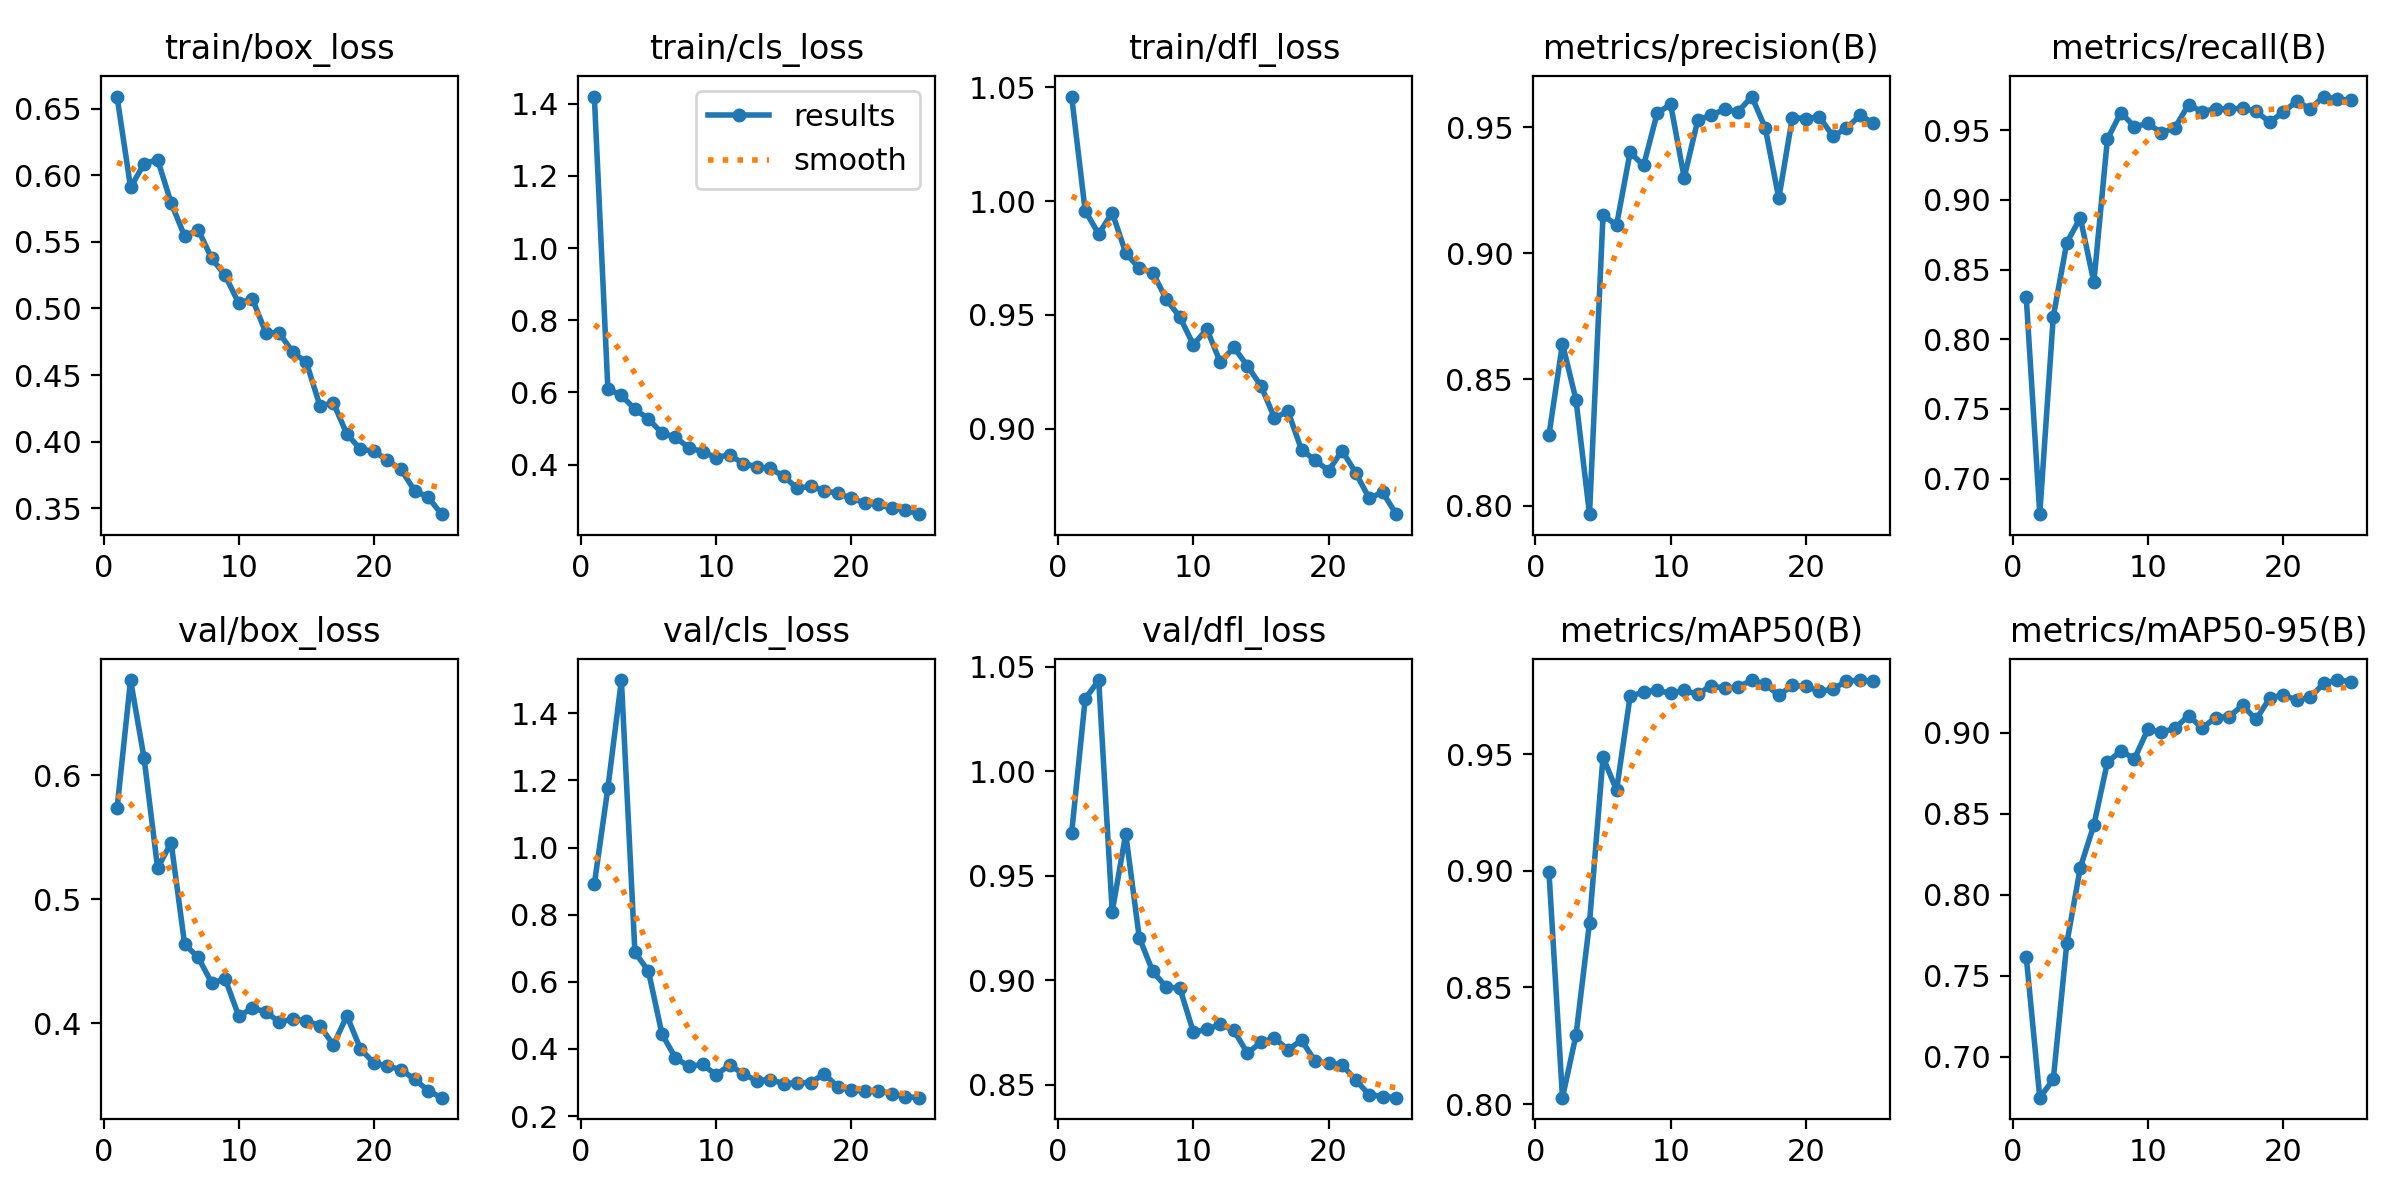

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


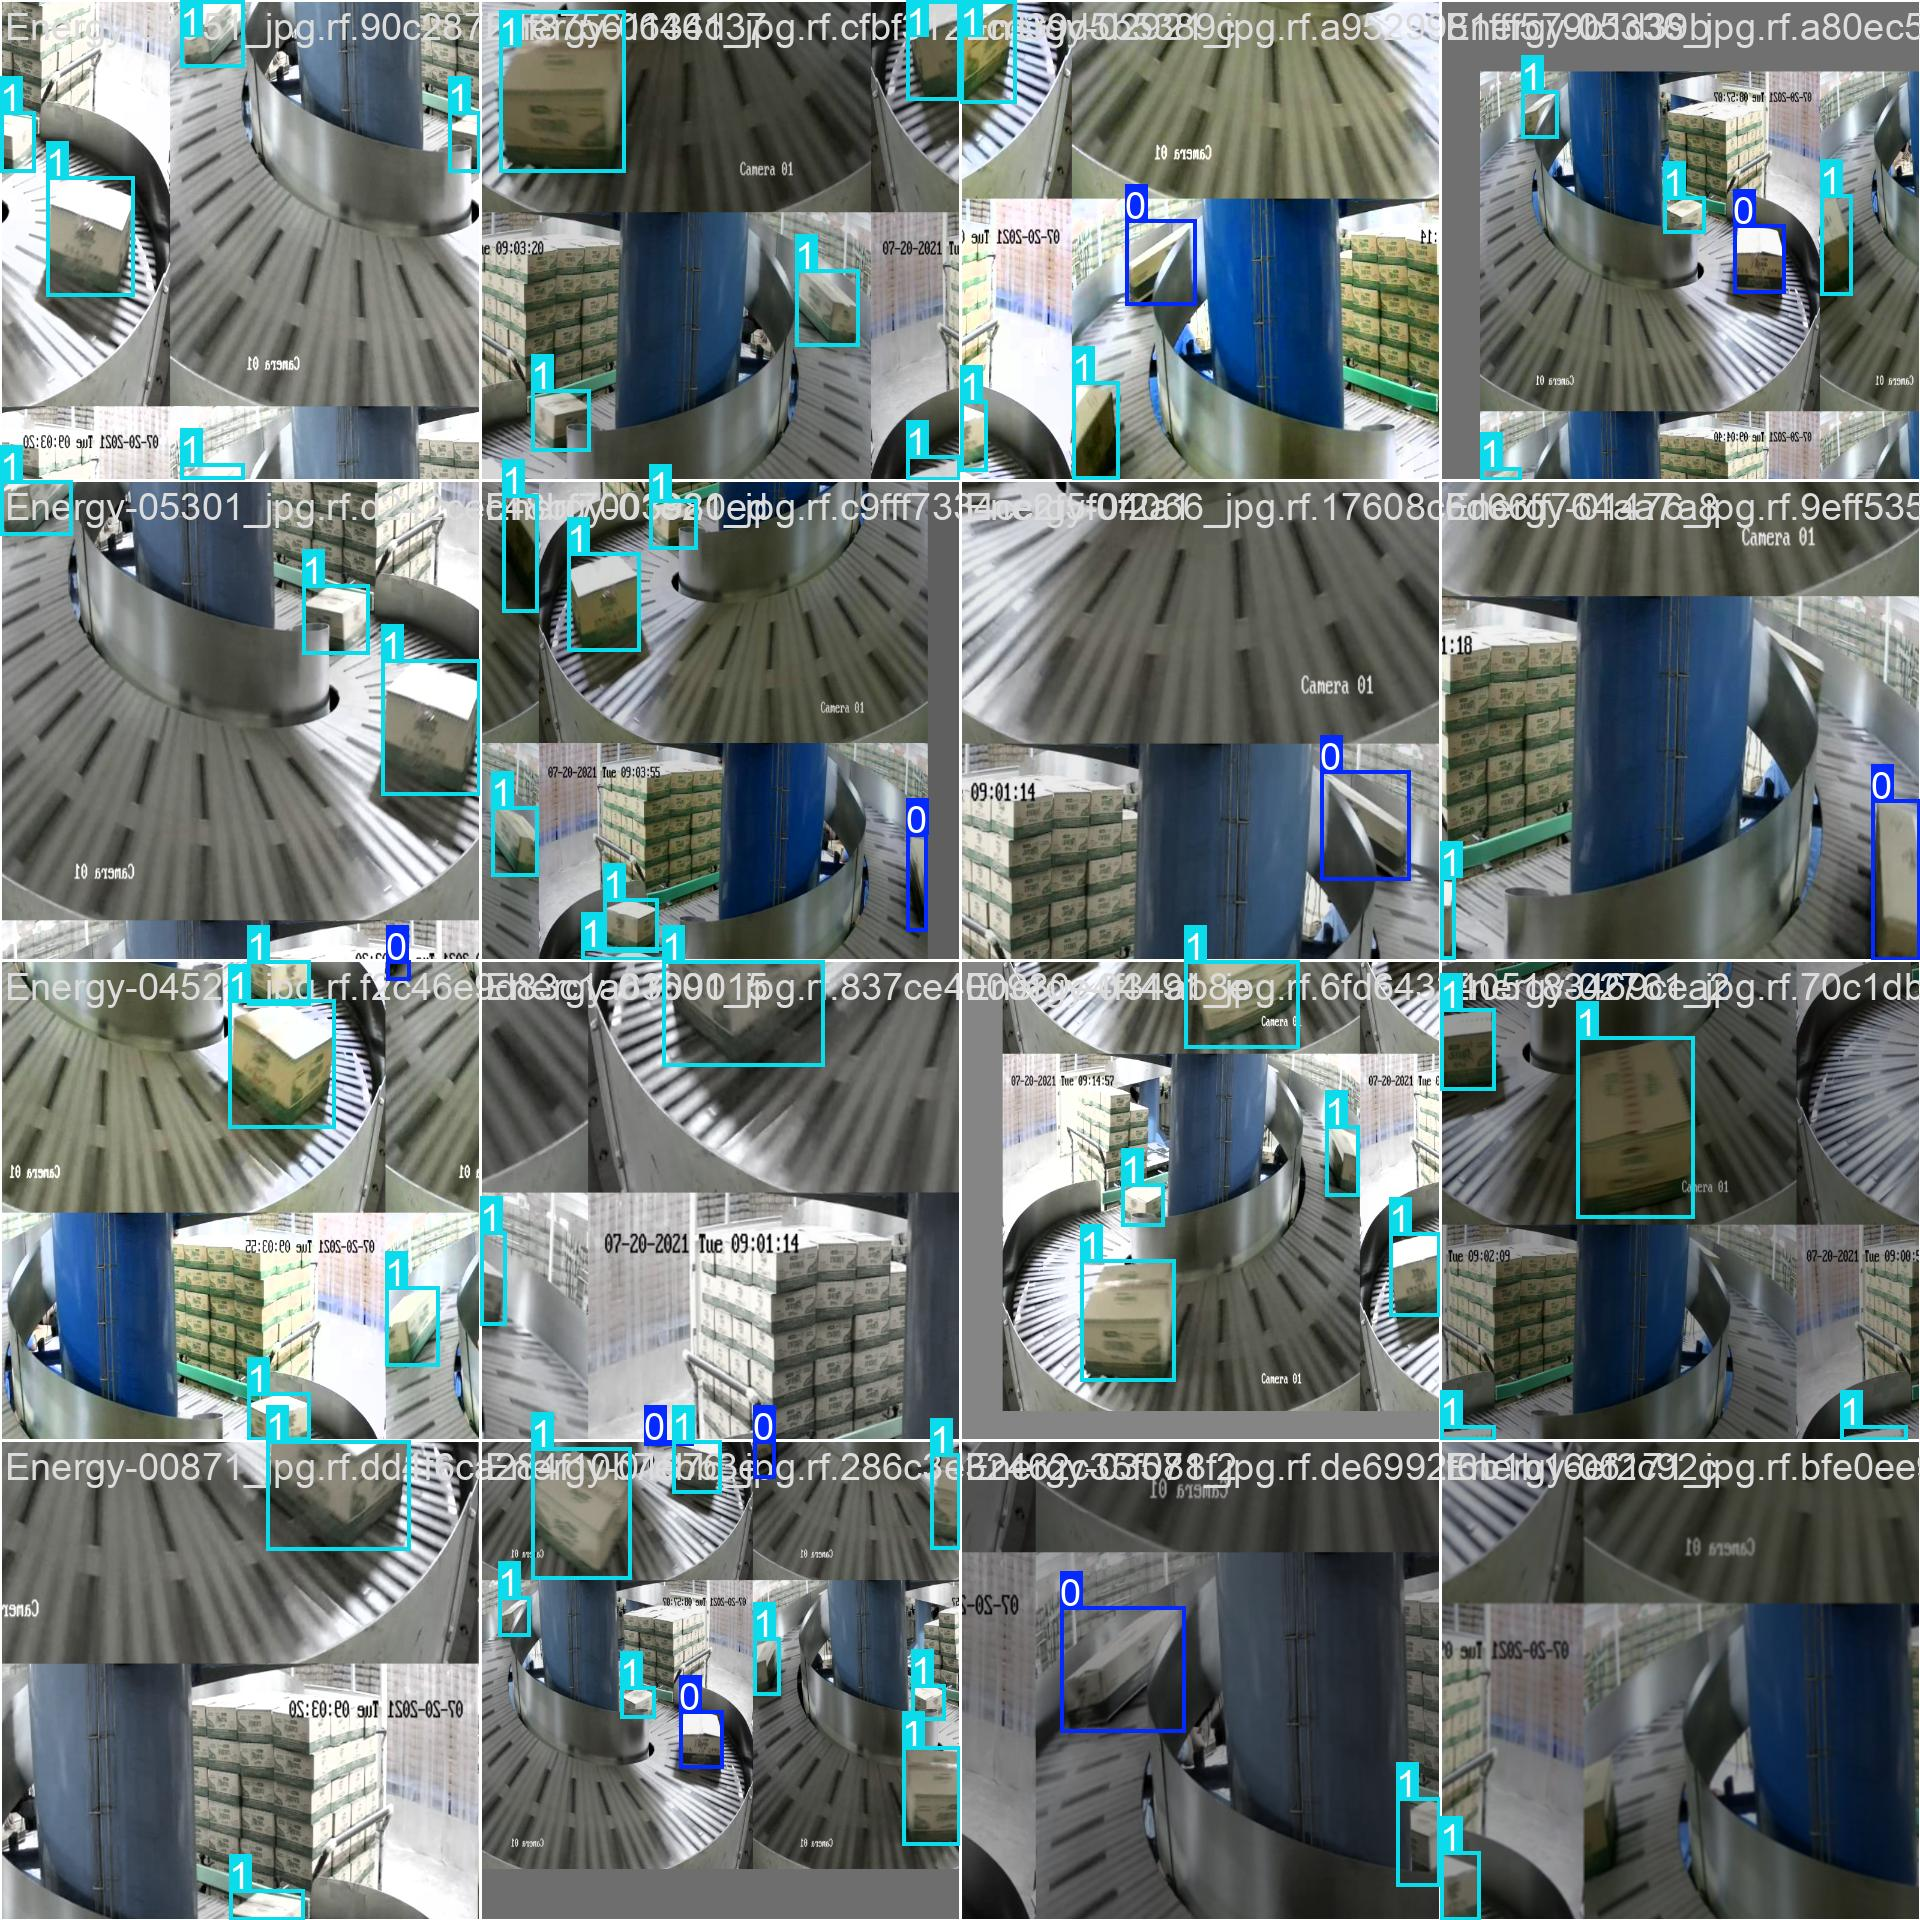

In [12]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width = 600)

In [13]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [14]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [15]:
!pip install supervision==0.1.0
from IPython import display
display.clear_output()
import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [16]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

## Tracking utils

Unfortunately, we have to manually match the bounding boxes coming from our model with those created by the tracker.

In [17]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [18]:
from ultralytics import YOLO

MODEL = "/content/runs/detect/train/weights/best.pt"
model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


In [19]:
CLASS_NAMES_DICT = model.model.names
CLASS_ID = [0]


0: 480x800 2 EnergyPlus_Larges, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


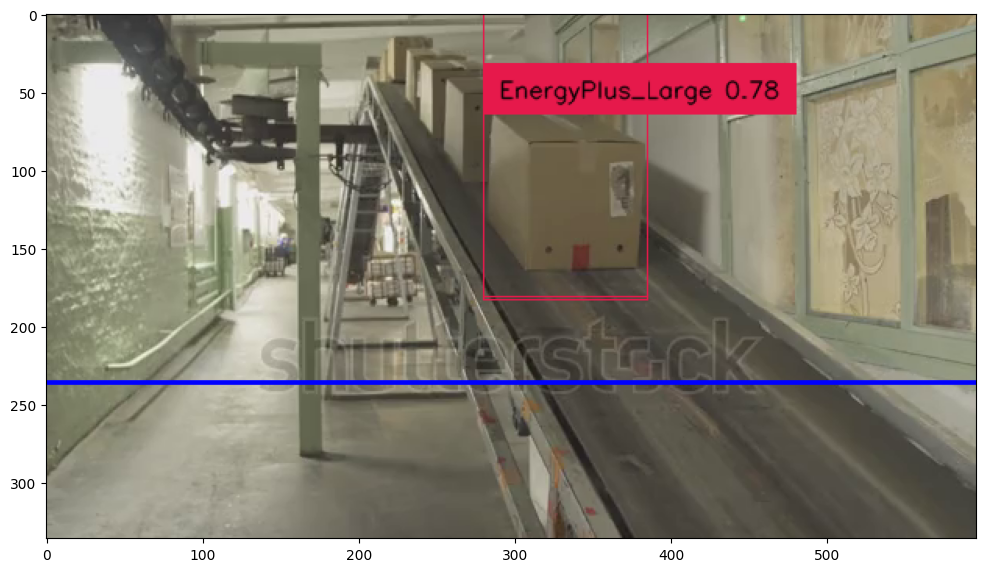

In [43]:
import cv2
SOURCE_VIDEO_PATH = "/content/17397133-preview.mp4"
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

box_annotator = BoxAnnotator(color=ColorPalette(), thickness= 1 , text_thickness = 1, text_scale= 0.5)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
height, width = frame.shape[:2]
LINE_START = (0, height-100)
LINE_END = (width, height-100)

results = model(frame)

detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
cv2.line(frame, LINE_START, LINE_END, (255, 0, 0), 2)  # Blue color, thickness 2

frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (12,12))

In [29]:
# settings
from supervision.geometry.dataclasses import Point
height, width = frame.shape[:2]

LINE_START = Point(0, height-1)
LINE_END = Point(width, 100)

TARGET_VIDEO_PATH = f"{HOME}/output.mp4"

In [26]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=596, height=336, fps=25, total_frames=572)

In [58]:
from tqdm.notebook import tqdm
import numpy as np
import cv2

LINE_Y = height - 100
LINE_START = Point(0, height-100)
LINE_END = Point(width, height-100)
byte_tracker = BYTETracker(BYTETrackerArgs())
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
line_counter = LineCounter(start=LINE_START, end=LINE_END)
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=0.5)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=1, text_scale=0.7)

# counting


crossed_objects_in = set()
crossed_objects_out = set()
total_count_in = 0
total_count_out = 0

# output

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame_counter, frame in enumerate(tqdm(generator, total=video_info.total_frames)):
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )

        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)


        print(f"Frame {frame_counter}: Tracker IDs - {detections.tracker_id}")

        for track in tracks:
            bbox = track.tlbr
            center_x = (bbox[0] + bbox[2]) / 2
            center_y = (bbox[1] + bbox[3]) / 2
             if LINE_Y - 10 < center_y < LINE_Y + 10:
                if track.track_id not in crossed_objects_in and center_y > LINE_Y:
                    crossed_objects_in.add(track.track_id)
                    total_count_in += 1
                    print(f"Object {track.track_id} crossed in at frame {frame_counter}")
                elif track.track_id not in crossed_objects_out and center_y < LINE_Y:
                    crossed_objects_out.add(track.track_id)
                    total_count_out += 1
                    print(f"Object {track.track_id} crossed out at frame {frame_counter}")

        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id in detections
        ]
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)

        cv2.line(frame, (LINE_START.x, LINE_START.y), (LINE_END.x, LINE_END.y), (255, 0, 0), 2)

        cv2.putText(frame, f"In: {total_count_in}",
                    (int(width // 2) - 100, int(LINE_Y - 30)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.putText(frame, f"Out: {total_count_out}",
                    (int(width // 2) - 100, int(LINE_Y + 30)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        sink.write_frame(frame)

print(f"Total objects crossed in: {total_count_in}")
print(f"Total objects crossed out: {total_count_out}")


  0%|          | 0/572 [00:00<?, ?it/s]


0: 480x800 2 EnergyPlus_Larges, 20.6ms
Speed: 3.7ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)
Frame 0: Tracker IDs - [267 268]

0: 480x800 2 EnergyPlus_Larges, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)
Frame 1: Tracker IDs - [267 268]

0: 480x800 2 EnergyPlus_Larges, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)
Frame 2: Tracker IDs - [267 268]

0: 480x800 1 EnergyPlus_Large, 15.5ms
Speed: 2.6ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)
Frame 3: Tracker IDs - [267]

0: 480x800 2 EnergyPlus_Larges, 15.5ms
Speed: 4.6ms preprocess, 15.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)
Frame 4: Tracker IDs - [267 268]

0: 480x800 2 EnergyPlus_Larges, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)
Frame 5: Tracker I